# Nova Scotia Collisions Logistic Regression Classifcation

## Importing Libraries

In [178]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

## Loading Nova Scotia Collisions Dataset

In [179]:
df = pd.read_csv('Nova Scotia Collisions.csv')
df

,Case File Number,Date,Time,Road Location,Intersecting Road Location,Road Configuration,Collision Configuration,Fatal_NonFatal_Injuries,Young Demographic,Pedestrian Collision,...,Bicycle Collision,Light Condition,Artificial Light Condition,Weather Condition,Road Surface,Road Condition,Unusual Environmental Circumstances,Road Alignment,Road Grade,School Purpose Related
0,400,2020-01-02,1:34:00,5626 FENWICK ST,,Non-intersection,Multiple vehicle,NaN,N,N,...,N,Darkness,Street lights on,Clear,Wet,Normal,NaN,Straight,Level,NaN
1,422,2020-01-02,2:55:00,205 BIRCH BEAR RUN,,Non-intersection,Single vehicle,NaN,Y,N,...,N,Darkness,Street lights on,Overcast or cloudy,Snow - wet,Normal,NaN,Curved,Level,NaN
2,288,2020-01-01,19:09:00,WINDMILL RD,FAULKNER ST,Non-intersection,Multiple vehicle,NaN,N,N,...,N,Daylight,Street lights off,Clear,Dry - normal,Normal,NaN,Straight,Level,NaN
3,44,2020-01-01,5:08:00,TOWER RD,SOUTH ST,Intersection - two or more public roads,Single vehicle,Non-Fatal Injury,N,Y,...,N,Darkness,Street lights on,Fog,Wet,Potholes or bumps,NaN,Straight,Level,NaN
4,288,2022-01-01,6:21:00,14 HIGHWAY 118,,Non-intersection,Unknown,Non-Fatal Injury,Y,N,...,N,Daylight,Unknown,Rain,Wet,Normal,NaN,Straight,Level,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25616,4008113,2024-12-29,0:30:00,48 LYNN DR,,Non-intersection,Multiple vehicle,NaN,N,N,...,N,Darkness,Street lights on,Clear,Dry - normal,Normal,NaN,Straight,Level,NaN
25617,152674,2024-11-07,0:36:00,DUTCH SETTLEMENT RD,HIGHWAY 277,Non-intersection,Single vehicle,NaN,Y,N,...,N,Darkness,Street lights on,Clear,Dry - normal,Normal,Animal,Unknown,Unknown,NaN
25618,174716,2024-12-20,13:34:00,HIGHWAY 102 SB EXIT 2A OFF RAMP,HIGHWAY 102,Non-intersection,Multiple vehicle,NaN,N,N,...,N,Daylight,Street lights off,Clear,Dry - normal,Normal,NaN,Straight,Level,NaN
25619,174884,2024-12-24,18:05:00,326 TRANSOM DR,,Non-intersection,Multiple vehicle,NaN,N,N,...,N,Daylight,Street lights off,Snow,Dry - normal,Normal,NaN,Straight,Level,NaN


## Filtering & Cleaning the Data

##### I will first look for nulls in the dataset before to make sure there are no empty rows for the analysis

In [180]:
df.isnull().sum()

Case File Number                           0
Date                                       0
Time                                       0
Road Location                              0
Intersecting Road Location                 2
Road Configuration                         0
Collision Configuration                    0
Fatal_NonFatal_Injuries                21866
Young Demographic                          0
Pedestrian Collision                       0
Aggressive Driving                         0
Distracted Driving                         0
Impaired Driving                           0
Bicycle Collision                          0
Light Condition                            0
Artificial Light Condition                 0
Weather Condition                          0
Road Surface                             744
Road Condition                           240
Unusual Environmental Circumstances    23873
Road Alignment                             0
Road Grade                                 0
School Pur

##### Since there are 'null' values present, I will use the code below to fill in the nulls with the word 'None

In [181]:
df.fillna('None', inplace = True)

##### Converting the columns that are text values to category types

In [182]:
df[['Road Location', 'Intersecting Road Location', 'Road Configuration', 'Collision Configuration', 'Fatal_NonFatal_Injuries','Young Demographic', 'Pedestrian Collision', 'Aggressive Driving', 'Distracted Driving', 'Impaired Driving', 'Bicycle Collision', 'Light Condition', 'Artificial Light Condition', 'Weather Condition', 'Road Surface', 'Road Condition', 'Unusual Environmental Circumstances', 'Road Alignment', 'Road Grade', 'School Purpose Related']] = df[['Road Location', 'Intersecting Road Location', 'Road Configuration', 'Collision Configuration', 'Fatal_NonFatal_Injuries','Young Demographic', 'Pedestrian Collision', 'Aggressive Driving', 'Distracted Driving', 'Impaired Driving', 'Bicycle Collision', 'Light Condition', 'Artificial Light Condition', 'Weather Condition', 'Road Surface', 'Road Condition', 'Unusual Environmental Circumstances', 'Road Alignment', 'Road Grade', 'School Purpose Related']].astype('category')

##### Double checking to see if there are any null values present and the datatypes of the columns

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25621 entries, 0 to 25620
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Case File Number                     25621 non-null  int64   
 1   Date                                 25621 non-null  object  
 2   Time                                 25621 non-null  object  
 3   Road Location                        25621 non-null  category
 4   Intersecting Road Location           25621 non-null  category
 5   Road Configuration                   25621 non-null  category
 6   Collision Configuration              25621 non-null  category
 7   Fatal_NonFatal_Injuries              25621 non-null  category
 8   Young Demographic                    25621 non-null  category
 9   Pedestrian Collision                 25621 non-null  category
 10  Aggressive Driving                   25621 non-null  category
 11  Distracted Driv

##### Now that the datatypes are set and there are no nulls present, I will alter the 'Date' and 'Time' columns so that the year, month, and day are separated and the hour, minute, and seconds are separated and moved to the beginning of the dataframe to improve the analyis

In [184]:
time_format = '%H:%M:%S' #setting the time format for the dataframe to understand and convert

In [185]:
df['Date'] = pd.to_datetime(df['Date']) #Converting to a datetime type
df['Time'] = pd.to_datetime(df['Time'], format=time_format).dt.time #converting the time to a datetime type

In [186]:
df['Datetime'] = pd.to_datetime(df[['Date']].astype(str).agg('-'.join, axis=1) + ' ' + df['Time'].astype(str)) #joining the date and time columns together

In [187]:
df['Year'] = df['Datetime'].dt.year #taking the year, month, and day from the 'Date' column and creating columns of their own
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day

In [188]:
df['Hour'] = df['Datetime'].dt.hour #taking the hours, minutes, and seconds from the 'Time' column and creating columns of their own
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second

In [189]:
cols = ['Year', 'Month', 'Day','Hour','Minute','Second'] + [col for col in df.columns if col not in ['Year', 'Month', 'Day','Hour','Minute','Second']]
df = df[cols] #moving these columns to the front of the dataset 

##### Adding a Collision Count column for each collision to be able to visually represent the data better

In [190]:
df['Collision Count'] = 1

C:\Users\coste\AppData\Local\Temp\ipykernel_37760\351939819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Collision Count'] = 1


##### Now that all the new columns we will use are present we can drop columns that will not be used in the analysis

In [191]:
df = df.drop(columns= df[['Datetime','Date','Time','Case File Number','Road Location','Intersecting Road Location','Unusual Environmental Circumstances','School Purpose Related', 'Road Grade','Road Alignment','Road Surface','Road Condition']])

##### Now that we have removed the columns and the cleaning process is finished we can view the new dataframe

In [192]:
df

,Year,Month,Day,Hour,Minute,Second,Road Configuration,Collision Configuration,Fatal_NonFatal_Injuries,Young Demographic,Pedestrian Collision,Aggressive Driving,Distracted Driving,Impaired Driving,Bicycle Collision,Light Condition,Artificial Light Condition,Weather Condition,Collision Count
0,2020,1,2,1,34,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Darkness,Street lights on,Clear,1
1,2020,1,2,2,55,0,Non-intersection,Single vehicle,None,Y,N,N,N,N,N,Darkness,Street lights on,Overcast or cloudy,1
2,2020,1,1,19,9,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Daylight,Street lights off,Clear,1
3,2020,1,1,5,8,0,Intersection - two or more public roads,Single vehicle,Non-Fatal Injury,N,Y,N,N,N,N,Darkness,Street lights on,Fog,1
4,2022,1,1,6,21,0,Non-intersection,Unknown,Non-Fatal Injury,Y,N,Y,N,Y,N,Daylight,Unknown,Rain,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25616,2024,12,29,0,30,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Darkness,Street lights on,Clear,1
25617,2024,11,7,0,36,0,Non-intersection,Single vehicle,None,Y,N,N,N,N,N,Darkness,Street lights on,Clear,1
25618,2024,12,20,13,34,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Daylight,Street lights off,Clear,1
25619,2024,12,24,18,5,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Daylight,Street lights off,Snow,1


## Visualizing the data 

##### Below are some visualizations from the dataset, before creating the visuals the code below is grouping some category fields from the data for a better visual representation

In [193]:
df_summed_years = df.groupby('Year',observed=True)['Collision Count'].sum().reset_index() #Grouping the total collisions for each year
df_summed_vehicles = df.groupby('Collision Configuration',observed=True)['Collision Count'].sum().reset_index() #Grouping the total collisions by each collision configuration
df_summed_demo = df.groupby('Young Demographic',observed=True)['Collision Count'].sum().reset_index() # Grouping the total collisions by young and old demographics
df_summed_light = df.groupby('Artificial Light Condition',observed=True)['Collision Count'].sum().reset_index() # Grouping the total collisions by artificial light condition

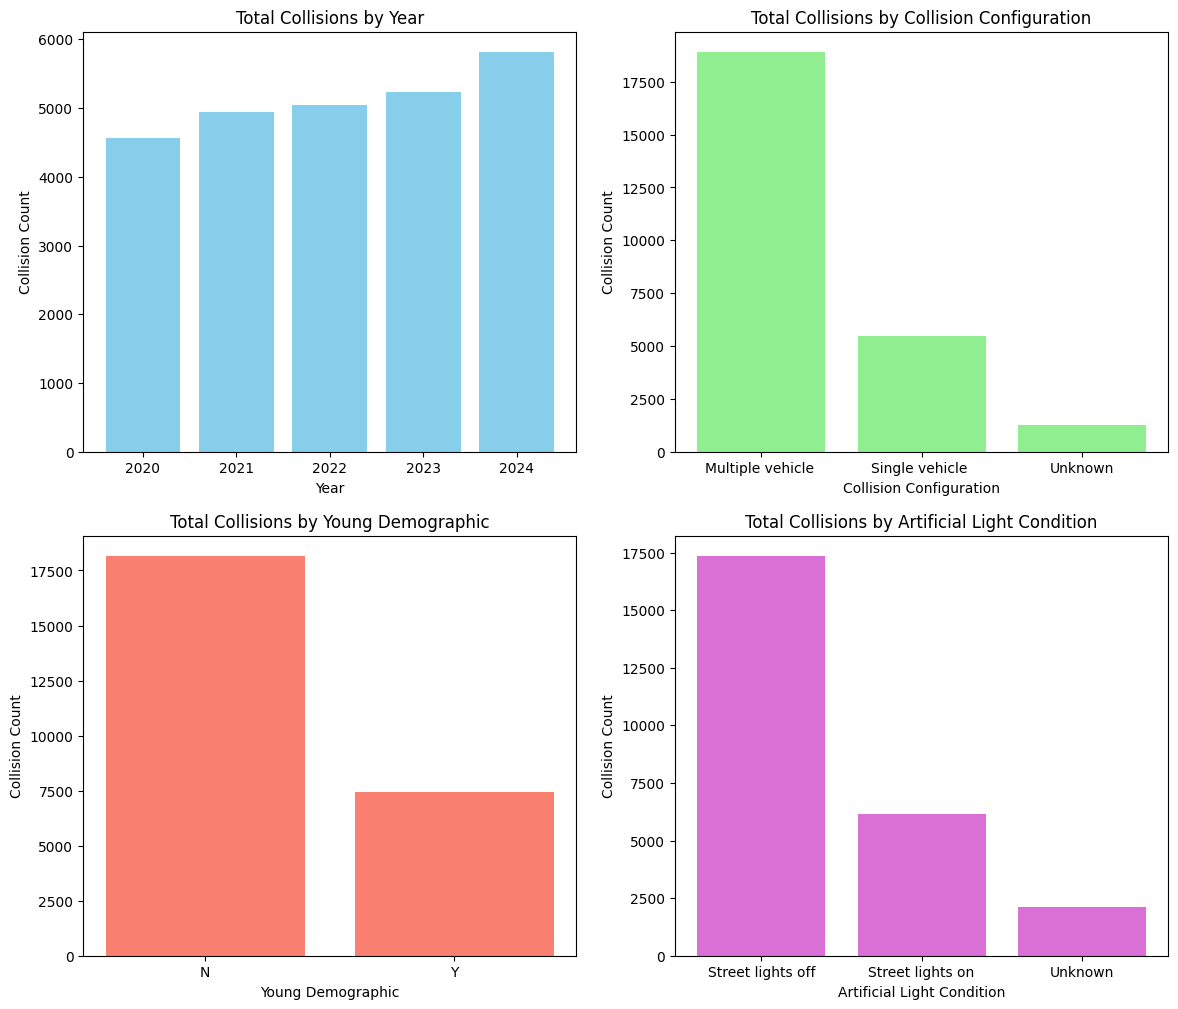

In [194]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Plot for total tollisions by year
axes[0, 0].bar(df_summed_years['Year'], df_summed_years['Collision Count'], color='skyblue')
axes[0, 0].set_title('Total Collisions by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Collision Count')

# Plot for total collisions by collision configuration
axes[0, 1].bar(df_summed_vehicles['Collision Configuration'], df_summed_vehicles['Collision Count'], color='lightgreen')
axes[0, 1].set_title('Total Collisions by Collision Configuration')
axes[0, 1].set_xlabel('Collision Configuration')
axes[0, 1].set_ylabel('Collision Count')

# Plot for total collisions by demographic
axes[1, 0].bar(df_summed_demo['Young Demographic'], df_summed_demo['Collision Count'], color='salmon')
axes[1, 0].set_title('Total Collisions by Young Demographic')
axes[1, 0].set_xlabel('Young Demographic')
axes[1, 0].set_ylabel('Collision Count')

# Plot for total collisions by artificial light condition
axes[1,1].bar(df_summed_light['Artificial Light Condition'], df_summed_light['Collision Count'], color='orchid')
axes[1,1].set_title('Total Collisions by Artificial Light Condition')
axes[1,1].set_xlabel('Artificial Light Condition')
axes[1,1].set_ylabel('Collision Count')
plt.show();

## Beginning Analysis

##### To begin the analysis, I will split the dataframe in to X and y for the train test split below

In [195]:
X = df.drop(columns = 'Artificial Light Condition')
X

,Year,Month,Day,Hour,Minute,Second,Road Configuration,Collision Configuration,Fatal_NonFatal_Injuries,Young Demographic,Pedestrian Collision,Aggressive Driving,Distracted Driving,Impaired Driving,Bicycle Collision,Light Condition,Weather Condition,Collision Count
0,2020,1,2,1,34,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Darkness,Clear,1
1,2020,1,2,2,55,0,Non-intersection,Single vehicle,None,Y,N,N,N,N,N,Darkness,Overcast or cloudy,1
2,2020,1,1,19,9,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Daylight,Clear,1
3,2020,1,1,5,8,0,Intersection - two or more public roads,Single vehicle,Non-Fatal Injury,N,Y,N,N,N,N,Darkness,Fog,1
4,2022,1,1,6,21,0,Non-intersection,Unknown,Non-Fatal Injury,Y,N,Y,N,Y,N,Daylight,Rain,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25616,2024,12,29,0,30,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Darkness,Clear,1
25617,2024,11,7,0,36,0,Non-intersection,Single vehicle,None,Y,N,N,N,N,N,Darkness,Clear,1
25618,2024,12,20,13,34,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Daylight,Clear,1
25619,2024,12,24,18,5,0,Non-intersection,Multiple vehicle,None,N,N,N,N,N,N,Daylight,Snow,1


In [196]:
y = df['Artificial Light Condition'] # passing through the 'Artificial Light Condition column to the y variable

In [197]:
y

0         Street lights on
1         Street lights on
2        Street lights off
3         Street lights on
4                  Unknown
               ...        
25616     Street lights on
25617     Street lights on
25618    Street lights off
25619    Street lights off
25620     Street lights on
Name: Artificial Light Condition, Length: 25621, dtype: category
Categories (3, object): ['Street lights off', 'Street lights on', 'Unknown']

##### Before beginning the model, since X is made up mostly of categories we can use a one hot encoder to turn the categories into an easier to read format for the Logistic Regression machine learning model

In [198]:
X = pd.get_dummies(X, drop_first=True)
X

,Year,Month,Day,Hour,Minute,Second,Collision Count,Road Configuration_Express lane of a freeway,Road Configuration_Intersection - private road or access,Road Configuration_Intersection - two or more public roads,...,Light Condition_Dusk,Light Condition_Unknown,Weather Condition_Dust or smoke,Weather Condition_Fog,Weather Condition_Freezing rain,Weather Condition_Overcast or cloudy,Weather Condition_Rain,Weather Condition_Snow,Weather Condition_Strong wind,Weather Condition_Unknown
0,2020,1,2,1,34,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,1,2,2,55,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2020,1,1,19,9,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,1,1,5,8,0,1,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,2022,1,1,6,21,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25616,2024,12,29,0,30,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25617,2024,11,7,0,36,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25618,2024,12,20,13,34,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25619,2024,12,24,18,5,0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Train Test Split

##### The X and y data is now ready to be passed through the train test split to ensure the data is not overloaded and our machine learning algorithm can better predit in the model

X_train and X_test will remain 2D and y_train and y_test will be taken from the 1D column we created above
For this train test split, we will be using a test size of 30% vs 70% and a random state of 42

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##### Now that the train variables are set, we can pass the 2D X variables through a scaler that will help normalize the data in the Logistic regression model

In [200]:
scaler = StandardScaler()

scaler.fit(X_train) #Fitting the X_train to the scaler

X_train = scaler.transform(X_train) #Transforming the X_train and X_test 2D dimensions into arrays
X_test = scaler.transform(X_test)

## Logistic Regression Model

##### Below I am defining the model as the Logistic Regression Machine Learning model
##### I chose the Logistic Regression model as it is designed for Y and N binary columns which are present in the X_train, and since the dataset is large it prevents overfitting
##### Since we are prediciting the probability of the street lights being on or off for each collision, the logistic model will help to predict the probability of our target

In [201]:
mdl = LogisticRegression() #Passing logistic regression through the model
mdl

LogisticRegression()

In [202]:
mdl.fit(X_train,y_train) #Fitting the logisic regression model to the X_train and y_train variables

LogisticRegression()

##### Now we can create the predictions from the model, we can pass through the X_test variable so we will be able to compare it to the y_test array that are the target values, we will first predict the proba used for classifications to represent the model's probability score of whether or not it thought the prediction was correct, then we will run the prediction values through y_pred to get the actual predictions

In [203]:
y_proba = mdl.predict_proba(X_test)
y_proba

array([[0.8854488 , 0.02938387, 0.08516734],
       [0.87038283, 0.05387172, 0.07574545],
       [0.09692459, 0.78478465, 0.11829076],
       ...,
       [0.11448944, 0.80791939, 0.07759116],
       [0.1812814 , 0.74290267, 0.07581593],
       [0.88594251, 0.05321088, 0.06084661]])

In [204]:
y_pred = mdl.predict(X_test)
y_pred

array(['Street lights off', 'Street lights off', 'Street lights on', ...,
       'Street lights on', 'Street lights on', 'Street lights off'],
      dtype=object)

##### Now to compare the actual answers in the dataframe to the predictions we will create a dataframe

In [205]:
roads = pd.DataFrame({'y_true': y_test, #the actual values that were in the train test split
                    'y_pred': y_pred, #the prediction values we passed through proba
                    'proba': [max(proba) for proba in y_proba] #the proba scores that the model created for the confidence in its predictions
                   })
roads['match'] = np.where(roads['y_true'] == roads['y_pred'], 1, 0) #a match column to show whether the model was correct or not 
roads

,y_true,y_pred,proba,match
23458,Street lights off,Street lights off,0.885449,1
3799,Unknown,Street lights off,0.870383,0
18583,Street lights on,Street lights on,0.784785,1
6423,Street lights off,Street lights off,0.854724,1
6892,Street lights off,Street lights off,0.886597,1
...,...,...,...,...
13053,Street lights on,Street lights on,0.632034,1
14581,Street lights off,Street lights off,0.863438,1
535,Street lights on,Street lights on,0.807919,1
24286,Street lights off,Street lights on,0.742903,0


##### We will now create a separate dataframe from our first one to see how many the Logistic Regression model got wrong

In [206]:
roads[roads['match'] == 0] 

,y_true,y_pred,proba,match
3799,Unknown,Street lights off,0.870383,0
10305,Unknown,Street lights off,0.831921,0
13531,Street lights off,Street lights on,0.775311,0
18724,Street lights off,Street lights on,0.712008,0
9701,Unknown,Street lights on,0.717764,0
...,...,...,...,...
2185,Unknown,Street lights off,0.844942,0
13037,Street lights on,Unknown,0.608218,0
25101,Unknown,Street lights off,0.904323,0
8300,Street lights off,Street lights on,0.863043,0


In [207]:
Wrong = 1250/7687
print(f'The Logistic Regression model for classification missed {Wrong:.2f} % of the data')

The Logistic Regression model for classification missed 0.16 % of the data


## Classification Report

##### Now that we have the model finished, we can create a classification report 

In [208]:
y_true = y_test ### passing the y_test from above into a y_true value
y_true

23458    Street lights off
3799               Unknown
18583     Street lights on
6423     Street lights off
6892     Street lights off
               ...        
13053     Street lights on
14581    Street lights off
535       Street lights on
24286    Street lights off
12639    Street lights off
Name: Artificial Light Condition, Length: 7687, dtype: category
Categories (3, object): ['Street lights off', 'Street lights on', 'Unknown']

##### Showing our X_test prediction again

In [209]:
y_pred = mdl.predict(X_test)
y_pred

array(['Street lights off', 'Street lights off', 'Street lights on', ...,
       'Street lights on', 'Street lights on', 'Street lights off'],
      dtype=object)

#### Accuracy Score

In [210]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}") #The accuracy of the logistic regression model

Accuracy of the logistic regression model: 0.84


#### Precision Score

In [211]:
precision = precision_score(y_true, y_pred, average = 'weighted')
print(f"Precision of the logistic regression model: {precision:.2f}") #Positive observations to total positives in the model

Precision of the logistic regression model: 0.84


#### Recall Score

In [212]:
recall = recall_score(y_true, y_pred, average='weighted') #using weighted, since the dataset is large and unbalanced
print(f"The recall of the logistic regression model: {recall:.2f}")

The recall of the logistic regression model: 0.84


#### F1 Score

In [213]:
f1 = f1_score(y_true, y_pred, average='weighted') #used weighted to balance out the model
print(f"The f1 score of the logistic regression model: {f1:.2f}")

The f1 score of the logistic regression model: 0.81


#### Full Classification Report

In [214]:
report = classification_report(y_true, y_pred, zero_division=1) #this is an overall report of the values above
print(report)

                   precision    recall  f1-score   support

Street lights off       0.87      0.92      0.89      5157
 Street lights on       0.76      0.84      0.80      1876
          Unknown       0.88      0.13      0.22       654

         accuracy                           0.84      7687
        macro avg       0.84      0.63      0.64      7687
     weighted avg       0.84      0.84      0.81      7687



#### Confusion Matrix

In [215]:
ca = confusion_matrix(y_true, y_pred) #this is a matrix showing the values we got correct and incorrect
ca

array([[4770,  382,    5],
       [ 286, 1584,    6],
       [ 451,  120,   83]], dtype=int64)

## Visual of Confusion Matrix

##### To better understand and read the confusion matrix above, here is a visual that enlarges it to show the incorrect compared to the correct values from the prediction model

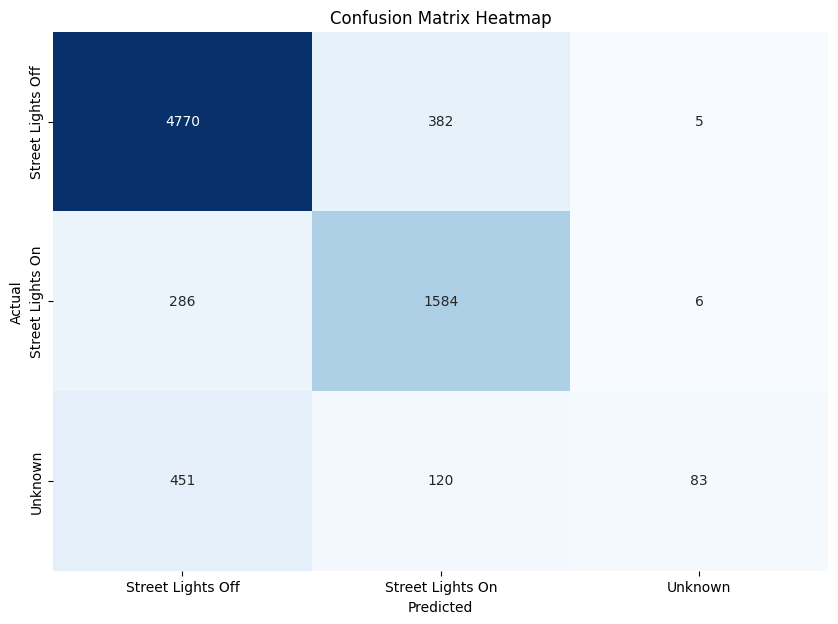

In [216]:
class_labels = ['Street Lights Off', 'Street Lights On','Unknown']
 
plt.figure(figsize=(10, 7))

sns.heatmap(ca, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
 
plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix Heatmap')

plt.show()

## Summary

The logistic regression model performed well missing only 16% of the dataset, the only poor scores that were returned were the recall and f1 scores for the 'Unknown' category, which made sense since it was the column with the least amount of values and would be more difficult for the model to analyze and predict from